# **COGS 109 Final Project - Multivariate Linear Regression of Heart Disease Attributes to Blood Pressure**


**Members**:


*  Anjali Ramesh : A15524912
*  Ashna Sood : A15464709 
*  Harmeena Sandhu : A15534745
*  Saroop Samra : A15383517
*  Urmi Suresh : A15593367










Dataset Citation:

[1] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml/datasets/statlog+(heart) ]. Irvine, CA: University of California, School of Information and Computer Science.

## **Background**

  We are looking at the UCI Statlog (Heart) data set [1]. This dataset consists of 14 attributes with 270 samples. The attributes are the following: age, sex, chest pain type (4 values), resting blood pressure, serum cholesterol in mg/dl, fasting blood sugar > 120 mg/dl, resting electrocardiographic results (values 0,1,2), maximum heart rate achieved,exercise induced angina, oldpeak = ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by fluoroscopy, thal: 3 = normal; 6 = fixed defect; 7 = reversible defect, heart disease: 1 (no heart disease), 2 (has heart disease). While performing our analysis, we used one hot encoding to turn the nominal variables into usable values. 

  With this dataset we want to use linear regression in order to predict blood pressure using 4 different models, each with a different number of attributes. We then will report which of these models best predict blood pressure by evaluating and comparing model performance and various error metrics such as the MSE, MAE, and RMSE. This dataset has previously been used for classification in order to identify whether the patient has heart disease or not; however, we want to use this dataset in order to predict blood pressure by linear regression.

  This is an important study because healthcare is a vital point of research in order to best help patients with certain conditions. Additionally, blood pressure specifically often has no symptoms, and yet if untreated high blood pressure can be a large contributor to more severe health conditions such as a stroke or heart attack [2]. According to the CDC, 1 in 3 U.S. adults are not even aware of their high blood pressure which means their blood pressure is going untreated [3]. Due to blood pressure presenting itself almost invisibly, we wanted to further understand what can best predict the blood pressure on the patient, which is useful information that could help diagnose someone with high blood pressure and get them the care that they need. Therefore using the UCI Statlog (Heart) data set we wanted to answer the question: which attribute(s) can be used to best predict a patient’s blood pressure. 

[2] “The Facts About High&nbsp;Blood Pressure.” Www.heart.org, 30 Nov. 2017,

[3] “5 Surprising Facts About High Blood Pressure.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 9 Nov. 2020

[4] https://stackabuse.com/linear-regression-in-python-with-scikit-learn/ 


In [ ]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

import seaborn as sns
sns.set()
sns.set_context('talk')

import patsy
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Load file
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat", header=None, sep=" ")


## **Data Cleanup**

In [ ]:
# Add column names
df.columns = ["age", "gender", "chest_pain_type", "blood_pressure", "cholesterol", "blood_sugar", "electrocardiographic", "heart_rate",
              "angina", "ST_depression", "ST_peak_exercise_slope", "major_vessels", "thal_type", "Heart_disease"]

# convert datatypes
df.age = df.age.astype("int")
df.gender = df.gender.astype("int")
df.chest_pain_type = df.chest_pain_type.astype("int")
df.blood_pressure = df.blood_pressure.astype("int")
df.cholesterol = df.cholesterol.astype("int")
df.blood_sugar = df.blood_sugar.astype("int")
df.electrocardiographic = df.electrocardiographic.astype("int")
df.heart_rate = df.heart_rate.astype("int")
df.angina = df.angina.astype("int")
df.ST_peak_exercise_slope = df.ST_peak_exercise_slope.astype("int")
df.major_vessels = df.major_vessels.astype("int")
df.thal_type = df.thal_type.astype("int")
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,blood_sugar,electrocardiographic,heart_rate,angina,ST_depression,ST_peak_exercise_slope,major_vessels,thal_type,Heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


## **Methods**

The data analysis technique we are using to analyse this dataset is multivariate linear regression. We are choosing this because it is the method that is the most appropriate to use given the characteristics of the Statlog data set. Since our research question is asking which attributes have the most important effect on predicting blood pressure, we want to use an analysis method that will show us the relationships between all the variables in our dataset (continuous, binary, and nominal) and our variable of interest, blood pressure. Since one of the major uses for linear regression models is determining the strength of predictors, this would be the ideal model. As for choosing multivariate linear regression, we want to see how multiple predictors affect the blood pressure variable. Through the use of multivariate regression, we are able to see how different models, each with a different grouping of variables, are able to predict blood pressure, and to what accuracy they are able to do so. 

We want to make four different multivariate linear regression models total, which attempt to narrow down the best predictors of blood pressure. In the first, we use all the continuous and binary variables, excluding the nominal variables. In the second, we want to include all the variables in the datasets, and are able to do so by using one-hot encoding to investigate the effect that the nominal variables have on the regression model. In the third model, we use only the three most positively correlated variables and the three most negatively correlated variables. In the fourth model, we use the top two variables most correlated with blood pressure. By doing this, and comparing the mean absolute error, mean squared error, and root mean squared error, we are able to compare the strength of each model. 


## **EDA**

In [ ]:
# show the described data
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,blood_sugar,electrocardiographic,heart_rate,angina,ST_depression,ST_peak_exercise_slope,major_vessels,thal_type,Heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


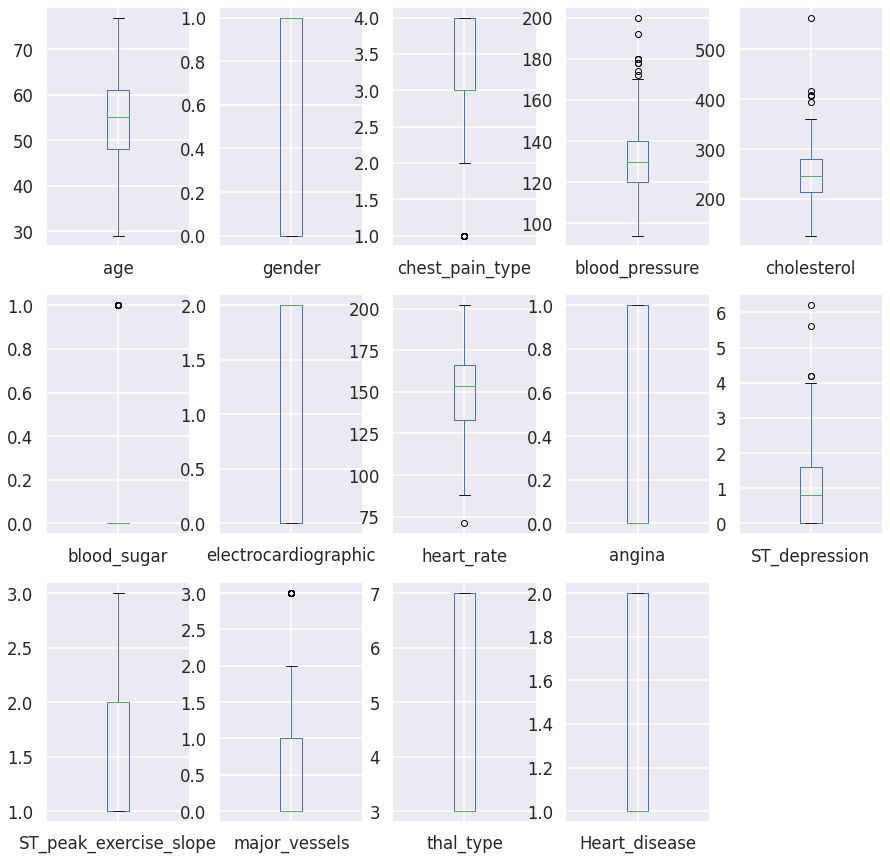

In [ ]:
# Boxplots -- univariate analysis for continuous features 
df.plot(kind='box', figsize=(15, 15), subplots=True, layout=(3, 5))
plt.show()

Below we have created a four by three subplot display. Each subplot contains a line plot of each variable of our datafame on the x axis, against the blood pressure variable, being our y axis. This was done in order to generally visualize the strength of the correlation between each variable and blood pressure, and to gauge what values each variable spans. For instance, age, cholesterol, heart rate and ST_depression are variables with a lot more variance than say, gender or thal type, in the ranges of possibilities a sample can contain. In general, this provides more understanding of the data before creating our correlation matrix and before conducting our analysis.

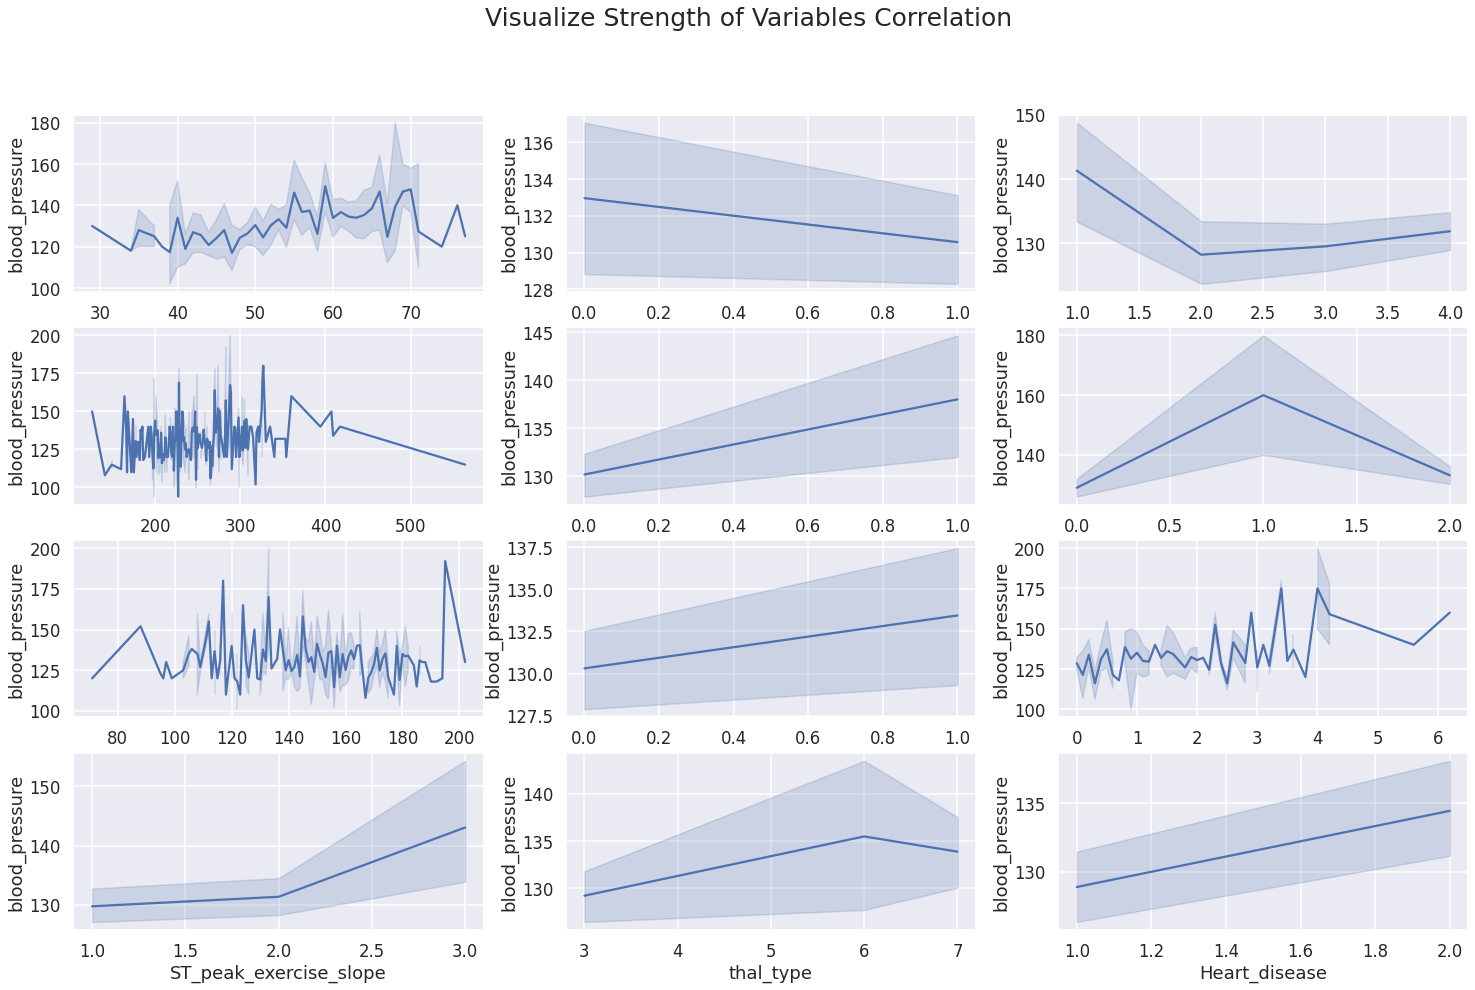

In [ ]:
#initializin a 4 by 3 subplot that we will hold our lineplot visualizations of each variable against blood presure
fig, axes = plt.subplots(4, 3, figsize=(25, 15))

#setting a title for our subplots to better indicate what they represent 
fig.suptitle('Visualize Strength of Variables Correlation', fontsize = 25)

#specifying which exact x variable against blood pressure will be going in which plot, and essentially plotting it
sns.lineplot(ax=axes[0, 0], data=df, x='age', y='blood_pressure')
sns.lineplot(ax=axes[0, 1], data=df, x='gender', y='blood_pressure')
sns.lineplot(ax=axes[0, 2], data=df, x='chest_pain_type', y='blood_pressure')
sns.lineplot(ax=axes[1, 0], data=df, x='cholesterol', y='blood_pressure')
sns.lineplot(ax=axes[1, 1], data=df, x='blood_sugar', y='blood_pressure')
sns.lineplot(ax=axes[1, 2], data=df, x='electrocardiographic', y='blood_pressure')
sns.lineplot(ax=axes[2, 0], data=df, x='heart_rate', y='blood_pressure')
sns.lineplot(ax=axes[2, 1], data=df, x='angina', y='blood_pressure')
sns.lineplot(ax=axes[2, 2], data=df, x='ST_depression', y='blood_pressure')
sns.lineplot(ax=axes[3, 0], data=df, x='ST_peak_exercise_slope', y='blood_pressure')
sns.lineplot(ax=axes[3, 1], data=df, x='thal_type', y='blood_pressure') 
sns.lineplot(ax=axes[3, 2], data=df, x='Heart_disease', y='blood_pressure')

plt.show()

Below we have calculated the line of best fit for each variable (x axis) against our blood pressure variable (y axis). In finding the line of best fit, and then plotting each line in comparison to the next, this gave a much clearer indication of the positive or negative correlative property of each varaible against blood pressure, and serves as another way to visualize and explore the data. Despite these correlations being visualized outside of a correlation matrix itself, we can grasp a general idea of which variables appear more influential, and it helps in understanding the data at a surface level.

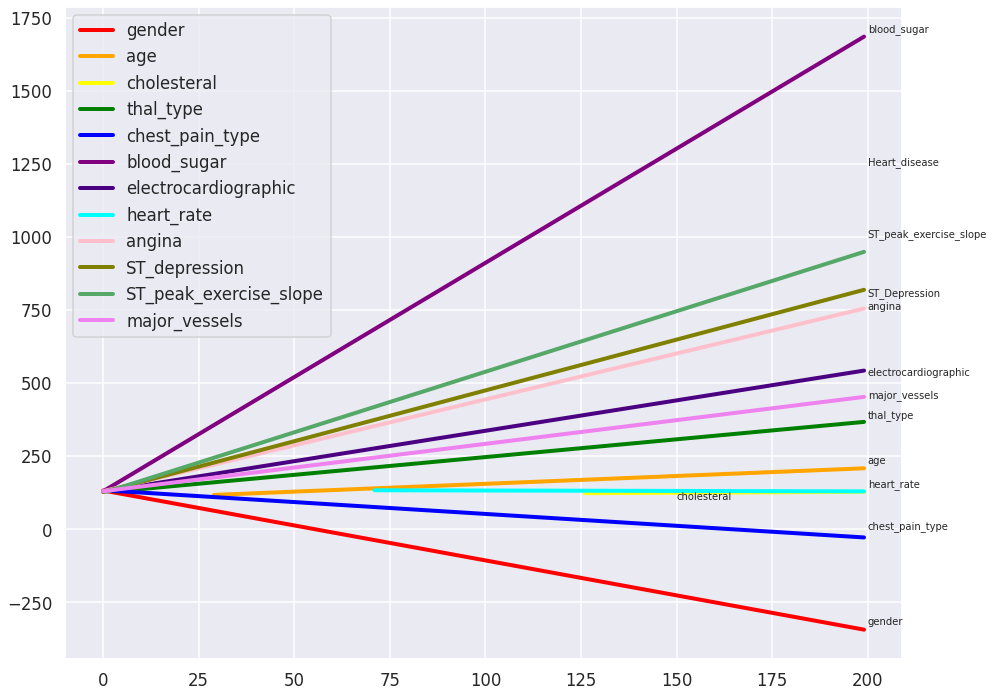

In [ ]:
#calculating the line of best fit for each variable against blood pressure 
a1, b1 = np.polyfit(df.gender,df.blood_pressure, 1)
x1s = np.arange(df['gender'].min(),df['blood_pressure'].max())
y1s = a1*x1s +b1

a2, b2 = np.polyfit(df.age,df.blood_pressure, 1)
x2s = np.arange(df['age'].min(), df['blood_pressure'].max())
y2s = a2*x2s +b2

a3, b3 = np.polyfit(df.cholesterol,df.blood_pressure, 1)
x3s = np.arange(df['cholesterol'].min(), df['blood_pressure'].max())
y3s = a3*x3s +b3

a4, b4 = np.polyfit(df.thal_type, df.blood_pressure, 1)
x4s = np.arange(df['thal_type'].min(),df['blood_pressure'].max())
y4s = a4*x4s +b4

a5, b5 = np.polyfit(df.chest_pain_type,df.blood_pressure, 1)
x5s = np.arange(df['chest_pain_type'].min(),df['blood_pressure'].max())
y5s = a5*x5s +b5

a6, b6 = np.polyfit(df.blood_sugar,df.blood_pressure, 1)
x6s = np.arange(df['blood_sugar'].min(), df['blood_pressure'].max())
y6s = a6*x6s +b6

a7, b7 = np.polyfit(df.electrocardiographic,df.blood_pressure, 1)
x7s = np.arange(df['electrocardiographic'].min(), df['blood_pressure'].max())
y7s = a7*x7s +b7

a8, b8 = np.polyfit(df.heart_rate, df.blood_pressure, 1)
x8s = np.arange(df['heart_rate'].min(),df['blood_pressure'].max())
y8s = a8*x8s +b8

a9, b9 = np.polyfit(df.angina,df.blood_pressure, 1)
x9s = np.arange(df['angina'].min(),df['blood_pressure'].max())
y9s = a9*x9s +b9

a10, b10 = np.polyfit(df.ST_depression,df.blood_pressure, 1)
x10s = np.arange(df['ST_depression'].min(), df['blood_pressure'].max())
y10s = a10*x10s +b10

a11, b11 = np.polyfit(df.ST_peak_exercise_slope,df.blood_pressure, 1)
x11s = np.arange(df['ST_peak_exercise_slope'].min(), df['blood_pressure'].max())
y11s = a11*x11s +b11

a12, b12 = np.polyfit(df.major_vessels, df.blood_pressure, 1)
x12s = np.arange(df['major_vessels'].min(),df['blood_pressure'].max())
y12s = a12*x12s +b12

a13, b13 = np.polyfit(df.Heart_disease,df.blood_pressure, 1)
x13s = np.arange(df['Heart_disease'].min(),df['blood_pressure'].max())
y13s = a13*x13s +b13

#Visualizing each line of best fit 
plt.figure(figsize=(15,12))
plt.plot(x1s, y1s, linewidth=4, label="gender", color="red")
plt.plot(x2s, y2s, linewidth=4, label="age", color="orange")
plt.plot(x3s, y3s, linewidth=4, label="cholesteral", color="yellow")
plt.plot(x4s, y4s, linewidth=4, label="thal_type", color="green")
plt.plot(x5s, y5s, linewidth=4, label="chest_pain_type", color="blue")
plt.plot(x6s, y6s, linewidth=4, label="blood_sugar", color="purple")
plt.plot(x7s, y7s, linewidth=4, label="electrocardiographic", color="indigo")
plt.plot(x8s, y8s, linewidth=4, label="heart_rate", color="aqua")
plt.plot(x9s, y9s, linewidth=4, label="angina", color="pink")
plt.plot(x10s, y10s, linewidth=4, label="ST_depression", color="olive")
plt.plot(x11s, y11s, linewidth=4, label="ST_peak_exercise_slope", color="g")
plt.plot(x12s, y12s, linewidth=4, label="major_vessels", color="violet")

plt.rcParams["figure.figsize"] = (50, 50)
plt.legend()
plt.text(200, 1700, 'blood_sugar')
plt.text(200, 1245, 'Heart_disease')
plt.text(200, 1000,'ST_peak_exercise_slope')
plt.text(200,800, 'ST_Depression' )
plt.text(200, 750,'angina')
plt.text(200,525,'electrocardiographic' )
plt.text(200,450 ,'major_vessels')
plt.text(200,380,'thal_type' )
plt.text(200,225, 'age')
plt.text(200,145, 'heart_rate' )
plt.text(200,0,'chest_pain_type' )
plt.text(200, -325,'gender')
plt.text(150, 100, 'cholesteral')
plt.show()

Here, we have taken the absolute value of the slope of each line, to visualize more than the direction of the apparent correlation, but the strength. This is a precurser to our official correlation matrix.

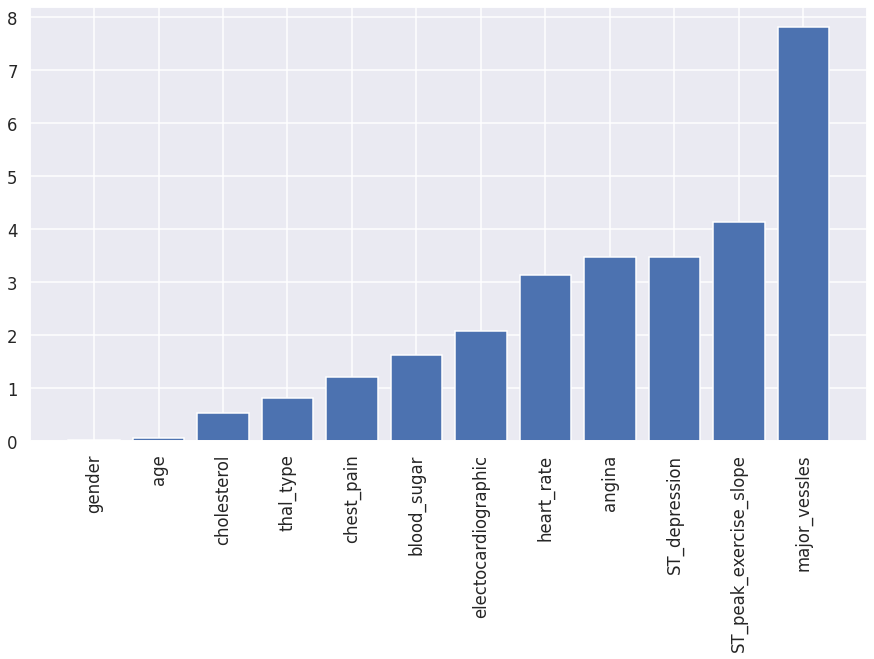

In [ ]:
#visualizing the slope of each line of best fit understand how "strong" each variable appears in its raw form
slopes = [abs(a10), abs(a2), abs(a3), abs(a4), abs(a5), abs(a6), abs(a7), abs(a8), abs(a9), abs(a10), abs(a11), abs(a12)]
reg_slopes = [(a10), (a2), (a3), (a4), (a5), (a6), (a7), (a8), (a9), a10, (a11), (a12), (a13)]
slopes = sorted(slopes)
reg_slopes = sorted(reg_slopes)
labels = ['gender', 'age', 'cholesterol', 'thal_type', 'chest_pain', 'blood_sugar', 'electocardiographic', 
          'heart_rate', 'angina','ST_depression', 'ST_peak_exercise_slope', 'major_vessles']
plt.figure(figsize=(15,8))
plt.bar(labels, slopes)
plt.rcParams["figure.figsize"] = (10, 10)
plt.tick_params(axis='x', rotation=90)

We plotted the correlation matrix which will help to understand which attributes and most correlated, seen in the figure below.

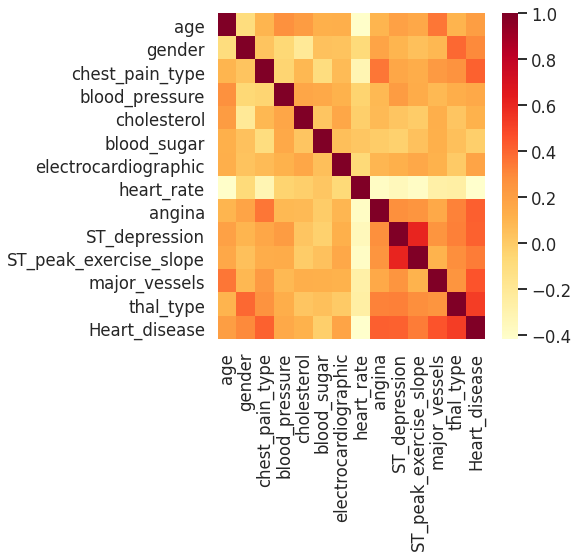

In [ ]:
# correlation matrix
corrMatrix = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrMatrix, annot=False, cmap='YlOrRd')
plt.show()

Since we are predicting blood pressure, the attributes correlation to blood pressure are most significant to our study. We plotted the filtered correlation matrix below. From this we see that age, ST depression, and cholestorel are the most positively correlated while heart rate, chest pain type, and gender are the most negatively correlated. 

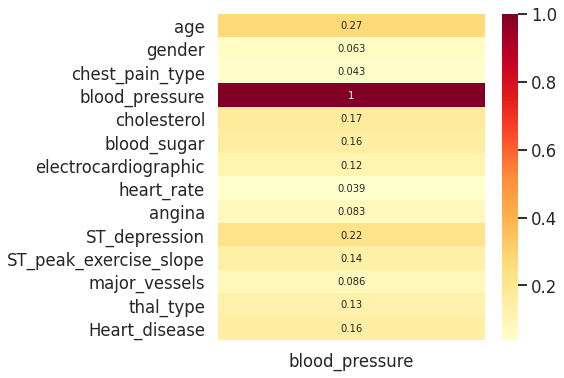

In [ ]:
# heatmap of only blood pressure row
plt.figure(figsize=(6,6))
sns.heatmap(abs(corrMatrix.blood_pressure.to_frame()), annot=True, yticklabels=True, cmap='YlOrRd')
plt.show()

## **Results**

### Sklearn Package Explanation
We used the sklearn package to implement linear regression for all four of our models [4]. The steps of how we are preforming linear regression are as follows:
- Step 1: We define the X as the variables we want to predict our Y with, Y being the blood pressure column.
- Step 2: We split the dataset with a test size of 20%. This means that 80% of the data will be used to train the model.
- Step 3: We then train the model using .fit() and additionally make predictions using .predict().
- Step 4: Next we need to calculate the weights and y-intercept of the linear regression model using .coef() and .intercept() and then display the equation
- Step 5: We then plot the actual values vs the predicted values for the model
- Step 6: Finally we calculate our error metrics Mean Average Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) by using functions mean_absolute_error() and mean_squared_error()



### **Linear Regression:** Model 1

Our first model is using attributes age, gender, cholesterol, blood sugar, heart rate, angina, ST depression, ST peak exercise slope, major vessels, and heart disease. 

We selected this as our first model as these are all the real number and binary attributes from the dataset (i.e. excluded nominal).

In [ ]:
# first define our X and y
X = df[["age", "gender", "cholesterol", "blood_sugar", "heart_rate",
              "angina", "ST_depression", "ST_peak_exercise_slope", "major_vessels", "Heart_disease"]]
y = df['blood_pressure']

In [ ]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create and train the linear regression model
m1_regressor = LinearRegression().fit(X_train, y_train)

# make predictions
y_pred = m1_regressor.predict(X_test)

# results of model 1 actual vs predicteds 
result1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result1.head()

,Actual,Predicted
51,128,135.365305
205,152,138.391743
176,140,133.912099
37,160,128.124807
84,110,129.375806


In [ ]:
# calculate the weights and y-intercept of the linear regression model and display the equation
m1_weights = np.round(m1_regressor.coef_, 4)
m1_intercept = np.round(m1_regressor.intercept_, 4)

print("Y = ", m1_weights[0], "* age + ", m1_weights[1], "* gender + ", m1_weights[2], "* cholesterol + ", m1_weights[3], "* blood_sugar + \n", 
  m1_weights[4], "* heart_rate + ", m1_weights[5], "* angina + ", m1_weights[6], "* ST_depression + ", m1_weights[7], "* ST_peak_exercise_slope + \n",
  m1_weights[8], "* major_vessels + ", m1_weights[9], "* heart_disease + ", m1_intercept)

Y =  0.5452 * age +  -3.7447 * gender +  0.0103 * cholesterol +  9.0994 * blood_sugar + 
 0.0941 * heart_rate +  2.2694 * angina +  3.289 * ST_depression +  -1.3174 * ST_peak_exercise_slope + 
 -1.531 * major_vessels +  2.8935 * heart_disease +  80.6436


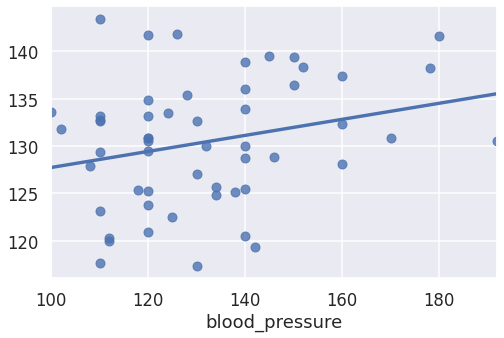

In [ ]:
# plot the actual values vs the predicted values for model 1 
plt.figure(figsize=(8,5))
ax = sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

### **Errors**: Model 1

In [ ]:
# create lists for the metrics for all 4 models 
mae = []
mse = []
rmse = []

In [ ]:
# calculate the MAE, MSE, and RMSE metrics for model 1 
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mae[-1])
print('Mean Squared Error:', mse[-1])
print('Root Mean Squared Error:', rmse[-1])

Mean Absolute Error: 15.680082640802087
Mean Squared Error: 388.67165102114825
Root Mean Squared Error: 19.714757188997996


### **Linear Regression:** Model 2

For our second model we want to use all 13 attributes to predict blood pressure. In order to do this, we must preform one-hot-encoding to tranform the nominal data (chest pain type, electrocardiographic, and thal type). 

In [ ]:
# One hot encoding for the nominal data -- chest pain type, electrocardiographic, and thal type
chest_pain_type_dummies = pd.get_dummies(df.chest_pain_type, prefix='Chest_Pain')
df = pd.concat([df, chest_pain_type_dummies], axis=1)

electrocardiographic_dummies = pd.get_dummies(df.electrocardiographic, prefix='Electrocardiographic')
df = pd.concat([df, electrocardiographic_dummies], axis=1)

thal_type_dummies = pd.get_dummies(df.thal_type, prefix='Thal_type')
df = pd.concat([df, thal_type_dummies], axis=1)
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,blood_sugar,electrocardiographic,heart_rate,angina,ST_depression,ST_peak_exercise_slope,major_vessels,thal_type,Heart_disease,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Chest_Pain_4,Electrocardiographic_0,Electrocardiographic_1,Electrocardiographic_2,Thal_type_3,Thal_type_6,Thal_type_7
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,0,0,0,1,0,0,1,1,0,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,0,0,1,0,0,0,1,0,0,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,0,1,0,0,1,0,0,0,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,0,0,0,1,1,0,0,0,0,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1,0,0,1,0,1,0,0,0,0,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1,0,1,0,0,1,0,0,0,0,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1,0,1,0,0,0,0,1,1,0,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1,0,0,0,1,1,0,0,0,1,0


In [ ]:
# define the X and y for model 2 - all 20 attributes with the transformed nominal data
X = df[["age", "gender", "cholesterol", "blood_sugar", "heart_rate",
         "angina", "ST_depression", "ST_peak_exercise_slope", "major_vessels", "Heart_disease",
        "Chest_Pain_1", "Chest_Pain_2", "Chest_Pain_3", "Chest_Pain_4",
        "Electrocardiographic_0", "Electrocardiographic_1", "Electrocardiographic_2",
        "Thal_type_3", "Thal_type_6", "Thal_type_7"]]
y = df['blood_pressure']

In [ ]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the linear regression model
m2_regressor = LinearRegression().fit(X_train, y_train)
# make predictions
y_pred = m2_regressor.predict(X_test)

# results of model 2 actual vs predicteds 
result2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result2.head()

,Actual,Predicted
229,118,138.348172
97,100,130.455583
74,106,127.600341
198,140,141.916169
120,120,121.598041


In [ ]:
# calculate the weights and y-intercept of the linear regression model and display the equation
m2_weights = np.round(m2_regressor.coef_, 4)
m2_intercept = np.round(m2_regressor.intercept_, 4)

print("Y = ", m2_weights[0], "* age + ", m2_weights[1], "* gender + ", m2_weights[2], "* cholesterol + ", m2_weights[3], "* blood_sugar + \n", 
  m2_weights[4], "* heart_rate + ", m2_weights[5], "* angina + ", m2_weights[6], "* ST_depression + ", m2_weights[7], "* ST_peak_exercise_slope + \n",
  m2_weights[8], "* major_vessels + ", m2_weights[9], "* heart_disease + ", m2_weights[10], "* Chest_Pain_1 + ", m2_weights[11], "* Chest_Pain_2 + \n", 
  m2_weights[12], "* Chest_Pain_3 + ", m2_weights[13], "* Chest_Pain_4 + ", m2_weights[14], "* Electrocardiographic_0 + \n", m2_weights[15], 
  "* Electrocardiographic_1 + ", m2_weights[16], "* Electrocardiographic_2 + ", m2_weights[17], "* Thal_type_3 + \n", m2_weights[18], 
  "* Thal_type_6 + ", m2_weights[19], "* Thal_type_7 + " , m2_intercept)

Y =  0.4467 * age +  -2.9617 * gender +  0.0479 * cholesterol +  5.0634 * blood_sugar + 
 0.1377 * heart_rate +  1.0485 * angina +  2.7976 * ST_depression +  -1.0946 * ST_peak_exercise_slope + 
 -1.693 * major_vessels +  3.8217 * heart_disease +  6.4162 * Chest_Pain_1 +  -3.6774 * Chest_Pain_2 + 
 -1.9342 * Chest_Pain_3 +  -0.8046 * Chest_Pain_4 +  -9.1334 * Electrocardiographic_0 + 
 15.965 * Electrocardiographic_1 +  -6.8316 * Electrocardiographic_2 +  -2.3412 * Thal_type_3 + 
 2.2544 * Thal_type_6 +  0.0867 * Thal_type_7 +  79.541


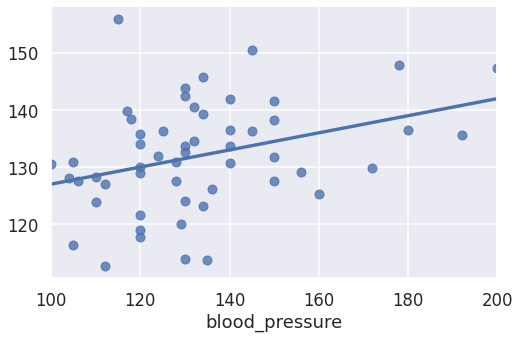

In [ ]:
# plot the actual values vs the predicted values for model 2 
plt.figure(figsize=(8,5))
ax = sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

### **Errors**: Model 2

In [ ]:
# calculate the MAE, MSE, and RMSE metrics for model 2 
mae.append(metrics.mean_absolute_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mae[-1])
print('Mean Squared Error:', mse[-1])
print('Root Mean Squared Error:', rmse[-1])

Mean Absolute Error: 15.50522679735932
Mean Squared Error: 414.3459725348009
Root Mean Squared Error: 20.355489985131797


### **Linear Regression:** Model 3

For Model 3 we decided to use the attributes we found being most positively and negatively correlated to blood pressure from our correlation matrix. The attributes most positively correlated are age, ST depression, and cholestorel are the most while the most negatively correlated are heart rate, chest pain type, and gender.

In [ ]:
# define the X and y for model 3 - top 3 positively correlated and top 3 negatively correlated attributes with blood pressure
X = df[["age", "gender", "cholesterol", "heart_rate", "ST_depression",
        "Chest_Pain_1", "Chest_Pain_2", "Chest_Pain_3", "Chest_Pain_4"]]
y = df['blood_pressure']

In [ ]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the linear regression model
m3_regressor = LinearRegression().fit(X_train, y_train)
# make predictions
y_pred = m3_regressor.predict(X_test)

# results of model 3 actual vs predicteds 
result3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result3.head()

,Actual,Predicted
269,160,135.406363
90,140,128.562140
32,120,119.204919
242,130,129.971451
10,135,130.619312


In [ ]:
# calculate the weights and y-intercept of the linear regression model and display the equation
m3_weights = np.round(m3_regressor.coef_, 4)
m3_intercept = np.round(m3_regressor.intercept_, 4)

print("Y = ", m3_weights[0], "* age + ", m3_weights[1], "* gender + ", m3_weights[2], "* cholesterol + ", m3_weights[3], "* heart rate + \n",
    m3_weights[4], "* ST depression + ", m3_weights[5], "* Chest Pain 1 + ", m3_weights[6], "* Chest Pain 2 + \n", m3_weights[7],
    "* Chest Pain 3 + ", m3_weights[8], "* Chest Pain 4 + ", m3_intercept)

Y =  0.414 * age +  -2.2348 * gender +  0.047 * cholesterol +  0.0817 * heart rate + 
 3.3651 * ST depression +  9.0969 * Chest Pain 1 +  -2.1377 * Chest Pain 2 + 
 -4.8307 * Chest Pain 3 +  -2.1285 * Chest Pain 4 +  84.7231


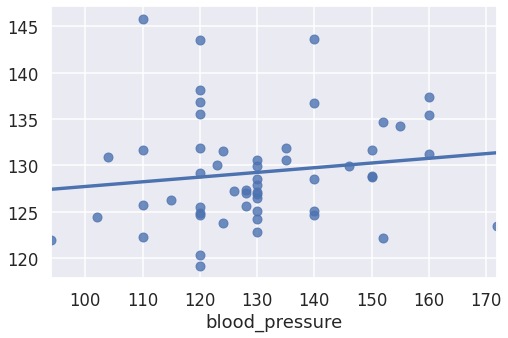

In [ ]:
# plot the actual values vs the predicted values for model 3 
plt.figure(figsize=(8,5))
ax = sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

### **Errors**: Model 3

In [ ]:
# calculate the MAE, MSE, and RMSE metrics for model 3 
mae.append(metrics.mean_absolute_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mae[-1])
print('Mean Squared Error:', mse[-1])
print('Root Mean Squared Error:', rmse[-1])

Mean Absolute Error: 12.267231425152364
Mean Squared Error: 265.13984961930134
Root Mean Squared Error: 16.283115476446802


### **Linear Regression: Model 4**

For Model 4 we decided to use the top two attributes we found being most positively and negatively correlated to blood pressure from our correlation matrix. The two attributes most correlated with blood pressure are age and ST depression.

In [ ]:
# define the X and y for model 4 - top 2 correlated attributes with blood pressure
X = df[["age", "ST_depression"]]
y = df['blood_pressure']

In [ ]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the linear regression model
m4_regressor = LinearRegression().fit(X_train, y_train)
# make predictions
y_pred = m4_regressor.predict(X_test)

# results of model 4 actual vs predicteds 
result4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result4.head()

,Actual,Predicted
6,130,130.877935
116,120,127.813030
53,140,131.704842
46,118,128.904483
83,130,129.433576


In [ ]:
# calculate the weights and y-intercept of the linear regression model and display the equation
m4_weights = np.round(m4_regressor.coef_, 4)
m4_intercept = np.round(m4_regressor.intercept_, 4)

print("Y = ", m4_weights[0], "* age + ", m4_weights[1], "* ST depression + ", m4_intercept)

Y =  0.3638 * age +  2.8664 * ST depression +  108.7843


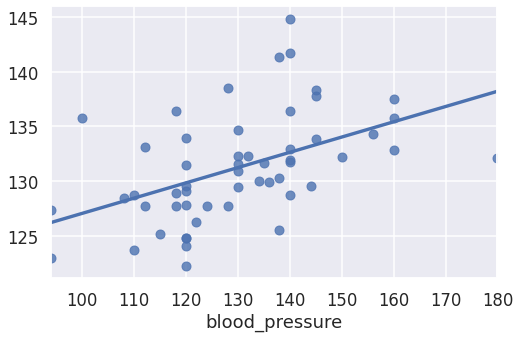

In [ ]:
# plot the actual values vs the predicted values for model 4 
plt.figure(figsize=(8,5))
ax = sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

### **Errors**: Model 4

In [ ]:
# calculate the MAE, MSE, and RMSE metrics for model 4
mae.append(metrics.mean_absolute_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mae[-1])
print('Mean Squared Error:', mse[-1])
print('Root Mean Squared Error:', rmse[-1])

Mean Absolute Error: 11.412702908931887
Mean Squared Error: 228.27486077553627
Root Mean Squared Error: 15.10876767891863


### **Model Comparison**

In [ ]:
# display the overall regressor metrics for the 4 models 
print("Model 1 metrics:\n", "MSE:", mse[0], "MAE:", mae[0], "RMSE:", rmse[0])
print("Model 2 metrics:\n", "MSE:", mse[1], "MAE:", mae[1], "RMSE:", rmse[1])
print("Model 3 metrics:\n", "MSE:", mse[2], "MAE:", mae[2], "RMSE:", rmse[2])
print("Model 4 metrics:\n", "MSE:", mse[3], "MAE:", mae[3], "RMSE:", rmse[3])

Model 1 metrics:
 MSE: 388.67165102114825 MAE: 15.680082640802087 RMSE: 19.714757188997996
Model 2 metrics:
 MSE: 414.3459725348009 MAE: 15.50522679735932 RMSE: 20.355489985131797
Model 3 metrics:
 MSE: 265.13984961930134 MAE: 12.267231425152364 RMSE: 16.283115476446802
Model 4 metrics:
 MSE: 228.27486077553627 MAE: 11.412702908931887 RMSE: 15.10876767891863


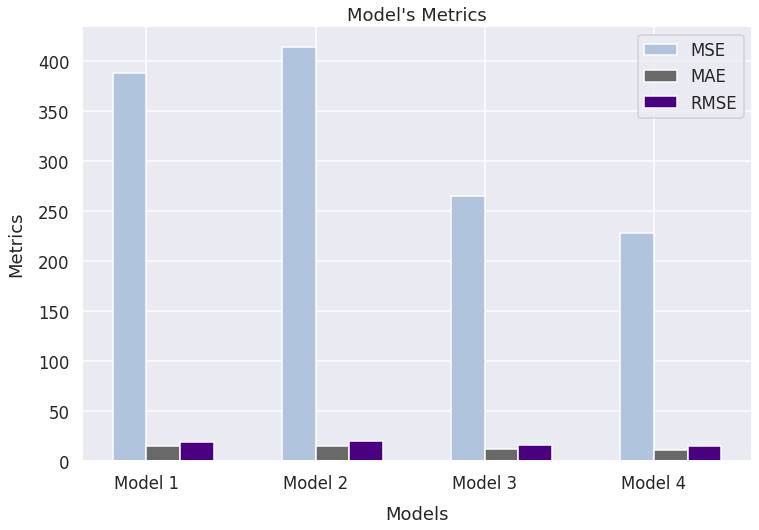

In [ ]:
# plot and visually compare the MAE, MSE, and RMSE metrics for each model
labels = ["Model 1", "Model 2", "Model 3", "Model 4"]
MSE = np.round(mse, 4)
MAE = np.round(mae, 4)
RMSE = np.round(rmse, 4)
ind = np.arange(4)
width = 0.20

plt.figure(figsize=(12, 8))
plt.bar(ind, MSE, width, label = "MSE", color="lightsteelblue")
plt.bar(ind + width, MAE, width, label = "MAE", color="dimgrey")
plt.bar(ind + 2*width, RMSE, width, label = "RMSE", color="indigo")

plt.xlabel("Models", labelpad=13)
plt.ylabel("Metrics", labelpad=13)
plt.xticks(ind + width/2, (labels))
plt.xticks(ha= "center")
plt.title("Model's Metrics")
plt.legend(loc="upper right")

plt.show()

Since the scale of the MSE metric is disproportionate to the MAE and RMSE metrics, we further plotted the MAE and RMSE metrics to visualize the differences between those two metrics. 

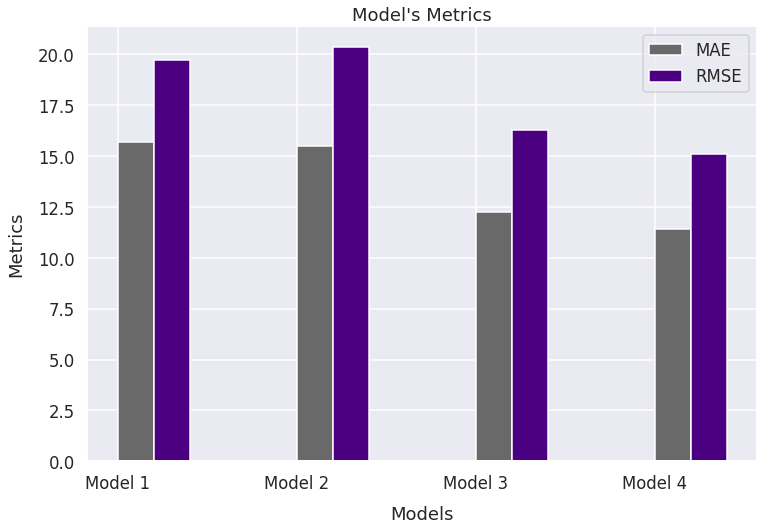

In [ ]:
# plot and visually compare the MAE and RMSE metrics for each model
plt.figure(figsize=(12, 8))
plt.bar(ind + width, MAE, width, label = "MAE", color="dimgrey")
plt.bar(ind + 2*width, RMSE, width, label = "RMSE", color="indigo")

plt.xlabel("Models", labelpad=13)
plt.ylabel("Metrics", labelpad=13)
plt.xticks(ind + width/2, (labels))
plt.xticks(ha= "center")
plt.title("Model's Metrics")
plt.legend(loc="upper right")

plt.show()

## **Discussion**

Throughout our analysis, the four models of linear regression we created eventually resulted in Model 4 performing the best, followed by Model 3, Model 1, and Model 2. Since the training and testing data was split randomly during each trial, the models slightly changed each time. However, the overall trend seemed to follow the same pattern. From the errors we can see that even after adding more attributes to the multivariate Model 2, this model still gets outperformed by Model 1. This means that by adding more attributes, the test error did not improve and therefore Model 1 is a better fit for the data than Model 2. 

Furthermore, Model 3 is where the attributes began to be more narrowed down as it used the attributes 3 most positively and 3 most negatively correlated to blood pressure (6 attributes in total). This model has lower test error than both Model 1 and Model 2 indicating that it is a better fit compared to those two models. 

Out of all the models, Model 4 had the lowest test error, which is what we expected. This model uses only the two most correlated variables, age and ST depression, which is most likely the reason why Model 4 has performed the best out of all 4 models. That means that Model 4 is the best model for predicting blood pressure with less, but more important attributes selected. 
This shows that adding more attributes does not, in this case, help predict blood pressure better.

The analysis technique of linear regression is appropriate for this data set, as there are over 12 variables at our disposal that allow us to create predictive models in determining blood pressure. Our models used those variables in different ways, all using linear regression that were successful in answering our research question (with Model 4 being the most accurate). 

Before comprising our models, and selecting certain variables to include, our exploration of the raw data allowed us to visualize the apparent relationships between each variable against blood pressure. We were able to grasp a loose idea of what to expect before creating our correlation matrix, which highlighted the most influential and important variables with respect to blood pressure. Ultimately, that allowed us to generate our most accurate model, Model 4, which used only two variables that were the most correlated according to the matrix. Exploring the raw data was a necessary step in understanding what we were working with, but the correlation matrix itself was what allowed us to confidently choose certain variables for our models. 

In the future, if we had more time and resources for this project, we would have liked to implement a decision stump, which is used to generate a decision tree with only one split, to further validate our models and see which factors had the greatest impact on blood pressure. Also, we would have compared the results we got to other similar heart disease datasets to see if our results were in the same realm, which would further validate these results. Having a larger dataset would also allow us to be more sure of our results, since more samples would yield better results. 

In terms of ethics, our project is not meant to suggest that certain aspects of one’s health are more important than others. Our goal was to use this dataset in a way that could potentially answer our research question, not to imply that the most correlative variables to blood pressure take precedent over variables that appear less influential. We also are not suggesting that only the variables listed in this dataset contribute to one's health, and we are also not trying to impose ideas of what “good” or “bad” blood pressure / health is. We hoped to eliminate this confusion by using neutral terminology in our research question and by referring to our dataset in ways that eliminate suggestion. The data used in this project was from a public source that removed the identities of those corresponding to each data sample. 


